In [1]:
import pandas as pd

We wanted to analyze award nominated movies and determine what features of a movie would best predict whether a movie would be nominated for Best Picture at the Oscars or not. Conducting this research would be valuable, because it will allow movie studios to more accurately evaluate their films’ chances of being nominated. In a combination of the ideal film topic, rating, duration, and prior awards buzz, studios can budget accordingly to maximize both buzz and box office gross. Studios may also be able to find out what the Academy and audience members value most about their movies.

##### We used 4 different datasets in total. With the  datasets, we wanted to merge them to get a robust dataset with more features that we could utilize for the machine learning portion of the section. 

# Data Cleaning



We first used the ‘final_dataset_with_rater_wins’ dataset and cleaned the data. This dataset contained information about the genres, title, rating, and runtime of Best Picture nominees from 1944-2018. 

In [2]:
oscar_nominees = pd.read_csv('Final_Dataset_with_rater_wins.csv')

In [3]:
oscar_nominees = oscar_nominees[['year', 'category', 'winner', 'title', 'genres', 'IMDBRating', 'runtimeMinutes']]
oscar_nominees.columns = ['year', 'category', 'winner', 'title', 'genres', 'rating', 'runtimeMinutes']

In [4]:
oscar_nominees.head()

,year,category,winner,title,genres,rating,runtimeMinutes
0,1944,BEST PICTURE,0,Double Indemnity,Crime|Drama|Film-Noir,8.3,107
1,1944,BEST PICTURE,0,Gaslight,Drama|Thriller,7.8,114
2,1944,BEST PICTURE,1,Going My Way,Comedy|Drama|Musical,7.2,126
3,1944,BEST PICTURE,0,Since You Went Away,Drama|War,7.6,177
4,1944,BEST PICTURE,0,Wilson,Drama,6.8,154


Next, we looked at IMDB's set of movies in their database, in order to add some non-Oscar nominated movies into our data.

In [5]:
imdb_title = pd.read_csv("title.basics.tsv", sep='\t')

In [6]:
imdb_title.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
imdb_rating = pd.read_csv("title.ratings.tsv", sep='\t')
imdb_data = imdb_title.merge(imdb_rating, on = "tconst", how="inner")

In [8]:
imdb_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1486
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,179
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,1119
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,109
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,1822


In [9]:

imdb_data = imdb_data[imdb_data['startYear'] != '\\N']
imdb_data = imdb_data.dropna()
imdb_data['startYear'] = imdb_data['startYear'].astype(int)
imdb_data.startYear.unique()

array([1894, 1892, 1893, 1895, 1896, 1898, 1897, 1900, 1899, 1901, 1904,
       1903, 1902, 1912, 1907, 1905, 1906, 1908, 1910, 1909, 1914, 1911,
       1913, 1919, 1916, 1917, 1915, 1918, 1936, 1925, 1920, 1921, 1922,
       1923, 1924, 1927, 1929, 1926, 1993, 1935, 1928, 1942, 1930, 1933,
       1931, 1932, 1939, 1937, 1950, 1938, 1951, 1934, 1983, 1946, 1940,
       1941, 1952, 1970, 1957, 1943, 1948, 1945, 1959, 1944, 2001, 1949,
       1947, 1953, 1954, 1965, 1973, 1995, 1955, 1962, 1958, 1956, 1960,
       1961, 1964, 1967, 1963, 1972, 1969, 1968, 1971, 1966, 1976, 1987,
       1986, 1990, 1977, 2018, 1979, 1974, 1981, 1988, 1978, 2013, 1989,
       1975, 2019, 2016, 1985, 1980, 2010, 2007, 1984, 1982, 1992, 1991,
       1999, 2005, 1994, 1998, 2002, 1997, 2004, 1996, 2017, 2000, 2009,
       2008, 2003, 2006, 2014, 2011, 1891, 2012, 2015, 1888, 1890, 1889,
       1887, 1878, 1874, 1883, 1881, 1885])

Within the IMDB dataset, we first limited movies so they started from 1944, which is when our oscar dataset starts.

In [10]:
imdb_data = imdb_data[imdb_data['startYear'] > 1943]

Then, since the Oscars are an American awards ceremony, we got rid of foreign movies. 

In [11]:
justseeing = imdb_title[imdb_title['primaryTitle'] != imdb_title['originalTitle']]

In [12]:
justseeing

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9,tt0000010,short,Exiting the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"
11,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896,\N,1,"Documentary,Short"
12,tt0000013,short,The Photographical Congress Arrives in Lyon,Neuville-sur-Saône: Débarquement du congrès de...,0,1895,\N,1,"Documentary,Short"
13,tt0000014,short,The Sprinkler Sprinkled,L'arroseur arrosé,0,1895,\N,1,"Comedy,Short"
20,tt0000022,short,Blacksmith Scene,Les forgerons,0,1895,\N,1,"Documentary,Short"
...,...,...,...,...,...,...,...,...,...
5769892,tt9913356,tvSeries,Halsey Live: News,Halsey Live: Morning News,0,2019,\N,\N,News
5770330,tt9914254,movie,A Cherry Tale,Kirsebæreventyret,0,2019,\N,85,Documentary
5770581,tt9914772,short,ELEVENELEVEN,Eleven Eleven,0,2016,\N,\N,"Short,Thriller"
5770977,tt9915592,movie,A Husband to Rent,Shohar-e kerayei,0,1974,\N,\N,Comedy


In [13]:
imdb_data = imdb_data[imdb_data['primaryTitle'] == imdb_data['originalTitle']]

In [14]:
imdb_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
3806,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance",6.2,20
6406,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,Western,5.5,20
6701,tt0022064,movie,Lebbra bianca,Lebbra bianca,0,1951,\N,100,Drama,4.6,11
7564,tt0023331,movie,Pesn o geroyakh,Pesn o geroyakh,0,1983,\N,50,Documentary,6.8,67
8135,tt0024121,movie,Houkutuslintu,Houkutuslintu,0,1946,\N,84,Drama,6.0,47


Since the IMDB dataset contains information about TV shows and shorts, alongside movies, we filtered it out to only look at information about movies.

In [15]:
temp1 = imdb_data[imdb_data['titleType'] == 'movie'] 
temp2 = imdb_data[imdb_data['titleType'] == 'tvMovie']
fin = pd.concat([temp1, temp2])

In [16]:
fin.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
3806,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance",6.2,20
6406,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,Western,5.5,20
6701,tt0022064,movie,Lebbra bianca,Lebbra bianca,0,1951,\N,100,Drama,4.6,11
7564,tt0023331,movie,Pesn o geroyakh,Pesn o geroyakh,0,1983,\N,50,Documentary,6.8,67
8135,tt0024121,movie,Houkutuslintu,Houkutuslintu,0,1946,\N,84,Drama,6.0,47


In [17]:
fin = fin[['titleType', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres', 'averageRating' ] ]

In [18]:
fin.columns = ['titleType', 'title', 'year', 'runtimeMinutes', 'genres', 'rating']
fin.head()

,titleType,title,year,runtimeMinutes,genres,rating
3806,movie,Dama de noche,1993,102,"Drama,Mystery,Romance",6.2
6406,movie,Arizona Territory,1950,56,Western,5.5
6701,movie,Lebbra bianca,1951,100,Drama,4.6
7564,movie,Pesn o geroyakh,1983,50,Documentary,6.8
8135,movie,Houkutuslintu,1946,84,Drama,6.0


We filtered on the imdb dataset some more by getting rid of any null values or '\\N' string values.

In [19]:
fin = fin[fin['runtimeMinutes'] != '\\N']
fin = fin.dropna()
oscar_nominees['runtimeMinutes'] = oscar_nominees['runtimeMinutes'].astype(int)
fin['runtimeMinutes'] = fin['runtimeMinutes'].astype(int)


Now we have a dataset with non foreign movies which were released after 1943. 


In [20]:

big = pd.merge(fin, oscar_nominees,  how='left', left_on=['title','year', 'rating', 'genres', 'runtimeMinutes'], right_on = ['title','year', 'rating', 'genres', 'runtimeMinutes'])

In [21]:
big.head()

,titleType,title,year,runtimeMinutes,genres,rating,category,winner
0,movie,Dama de noche,1993,102,"Drama,Mystery,Romance",6.2,NaN,NaN
1,movie,Arizona Territory,1950,56,Western,5.5,NaN,NaN
2,movie,Lebbra bianca,1951,100,Drama,4.6,NaN,NaN
3,movie,Pesn o geroyakh,1983,50,Documentary,6.8,NaN,NaN
4,movie,Houkutuslintu,1946,84,Drama,6.0,NaN,NaN


In order to extract a set of non-Oscar nominated movies to use in our dataset, we created a no nominees table. Since we had previously performed a left join on the filtered IMDB dataset and the Oscar nominee dataset, we knew that the movies that did not receive a Best Picture nom would have null values in the category (and winner) column.

The reason that we did not use "big" as our final dataset is because when we ran it, some of our Oscar nominee movies had been dropped from the dataset. Since we want to include all 412 of the Oscar nominees in the respective dataset, we decided to create our final dataset a bit differently.

In [22]:
big.isna().sum()

titleType              0
title                  0
year                   0
runtimeMinutes         0
genres                 0
rating                 0
category          180223
winner            180223
dtype: int64

In [23]:
no_nominees = big[big['category'].isna()]

In [24]:
no_nominees.head()

,titleType,title,year,runtimeMinutes,genres,rating,category,winner
0,movie,Dama de noche,1993,102,"Drama,Mystery,Romance",6.2,NaN,NaN
1,movie,Arizona Territory,1950,56,Western,5.5,NaN,NaN
2,movie,Lebbra bianca,1951,100,Drama,4.6,NaN,NaN
3,movie,Pesn o geroyakh,1983,50,Documentary,6.8,NaN,NaN
4,movie,Houkutuslintu,1946,84,Drama,6.0,NaN,NaN


Our no nominees table had over 180000 movies (although only a fraction of the original size of over 5 million entries, still too large in comparison to the number of Oscar nominees), so we reduced the table by retaining every 40th row. We acknowledge that this may not be the best way to data clean, but given that the no nominees table is not sorted by year/rating/genres, we thought it was as random of a cleaning as we could get.

In [25]:

tmp = no_nominees.iloc[::100]
len(tmp)

1803

In [26]:
tmp = tmp.drop(['titleType'], 1)
tmp.head()

,title,year,runtimeMinutes,genres,rating,category,winner
0,Dama de noche,1993,102,"Drama,Mystery,Romance",6.2,NaN,NaN
100,Bermuda Mystery,1944,65,Mystery,5.9,NaN,NaN
200,Experiment Perilous,1944,91,"Film-Noir,Romance,Thriller",6.5,NaN,NaN
300,Johnny Doesn't Live Here Anymore,1944,79,"Comedy,Romance,War",5.9,NaN,NaN
400,Night Club Girl,1945,61,"Comedy,Music,Romance",6.4,NaN,NaN


In [27]:
oscar_nominees.head()

,year,category,winner,title,genres,rating,runtimeMinutes
0,1944,BEST PICTURE,0,Double Indemnity,Crime|Drama|Film-Noir,8.3,107
1,1944,BEST PICTURE,0,Gaslight,Drama|Thriller,7.8,114
2,1944,BEST PICTURE,1,Going My Way,Comedy|Drama|Musical,7.2,126
3,1944,BEST PICTURE,0,Since You Went Away,Drama|War,7.6,177
4,1944,BEST PICTURE,0,Wilson,Drama,6.8,154


In [28]:
cols = ['year', 'category', 'winner', 'title', 'genres', 'rating', 'runtimeMinutes']
tmp = tmp[cols]
tmp.head()

,year,category,winner,title,genres,rating,runtimeMinutes
0,1993,NaN,NaN,Dama de noche,"Drama,Mystery,Romance",6.2,102
100,1944,NaN,NaN,Bermuda Mystery,Mystery,5.9,65
200,1944,NaN,NaN,Experiment Perilous,"Film-Noir,Romance,Thriller",6.5,91
300,1944,NaN,NaN,Johnny Doesn't Live Here Anymore,"Comedy,Romance,War",5.9,79
400,1945,NaN,NaN,Night Club Girl,"Comedy,Music,Romance",6.4,61


We then noticed how some movies had multiple genres. For these movies, we assumed that the movie equally belonged to all genres it was classified as. Thus, we randomly selected a genre from the list of genres for that movie. 

In [29]:
import random

def calc_num(x):
    random.seed(1)
    num = random.randint(0,len(x)-1)
    return x[num]

tmp = tmp[tmp['genres'].notna()]

tmp['genres'] = tmp['genres'].apply(lambda x: calc_num(x.split(',')))
oscar_nominees['genres'] = oscar_nominees['genres'].apply(lambda x: calc_num(x.split('|')))

Now, we make our final dataset by concatinating the Best Picture nominees with the non-Best Picture nominees.

In [30]:
final = pd.concat([tmp, oscar_nominees])

In [31]:
len(final)

2215

In [32]:
final.head()

,year,category,winner,title,genres,rating,runtimeMinutes
0,1993,NaN,NaN,Dama de noche,Drama,6.2,102
100,1944,NaN,NaN,Bermuda Mystery,Mystery,5.9,65
200,1944,NaN,NaN,Experiment Perilous,Film-Noir,6.5,91
300,1944,NaN,NaN,Johnny Doesn't Live Here Anymore,Comedy,5.9,79
400,1945,NaN,NaN,Night Club Girl,Comedy,6.4,61


After this dataset was cleaned, we moved onto the ‘award_tag.csv’. With this dataset, we were only interested in whether or not the movie was nominated/won for other awards. Since there were so many awards to choose from, we only kept the nominated and won columns for BAFTA and SAG.

In [33]:
awards_dataset = pd.read_csv("award_tag.csv")
awards_dataset = awards_dataset.drop(['Genres','Year'], 1)
awards_dataset.columns = ['title', 'nominated_award','won_nomination']
rater_bafta = awards_dataset['nominated_award'] == 'BAFTA'
df_bafta = awards_dataset[rater_bafta]
df_bafta.columns = [ 'title','nominated_for_bafta','won_bafta']
df_bafta.head()

,title,nominated_for_bafta,won_bafta
664,Lawrence of Arabia,BAFTA,1
665,Tom Jones,BAFTA,1
666,Dr. Strangelove,BAFTA,1
667,My Fair Lady,BAFTA,1
668,Who's Afraid of Virginia Woolf?,BAFTA,1


In [34]:
rater_sag = awards_dataset['nominated_award'] == 'SAG'
df_sag = awards_dataset[rater_sag]
df_sag.columns = [ 'title','nominated_for_sag','won_sag']
df_sag.head()

,title,nominated_for_sag,won_sag
938,Apollo 13,SAG,1
939,The Birdcage,SAG,1
940,The Full Monty,SAG,1
941,Shakespeare in Love,SAG,1
942,American Beauty,SAG,1


We merged all award nominations/wins together to create a win/nominated movies dataset.

In [35]:

all_raters_with_wins = df_sag.merge(df_bafta,on='title',how='outer')
len(all_raters_with_wins)

337

Finally we merged all cleaned datasets to get our final dataset that we will use for both the EDA and machine learning sections. So, if the movie was not nominated for an award, it will have null values in those respective categories.

In [36]:
final_dataset_with_nom = pd.merge(final,all_raters_with_wins,on = 'title',how='left')
final_dataset_with_nom.head()

,year,category,winner,title,genres,rating,runtimeMinutes,nominated_for_sag,won_sag,nominated_for_bafta,won_bafta
0,1993,NaN,NaN,Dama de noche,Drama,6.2,102,NaN,NaN,NaN,NaN
1,1944,NaN,NaN,Bermuda Mystery,Mystery,5.9,65,NaN,NaN,NaN,NaN
2,1944,NaN,NaN,Experiment Perilous,Film-Noir,6.5,91,NaN,NaN,NaN,NaN
3,1944,NaN,NaN,Johnny Doesn't Live Here Anymore,Comedy,5.9,79,NaN,NaN,NaN,NaN
4,1945,NaN,NaN,Night Club Girl,Comedy,6.4,61,NaN,NaN,NaN,NaN


In [37]:
final_dataset_with_nom = final_dataset_with_nom[final_dataset_with_nom['genres'] != '\\N']
len(final_dataset_with_nom)

2148

In [38]:
import numpy as np

In [39]:
bafta_win = {np.NaN: 0,'BAFTA': 1}
final_dataset_with_nom.nominated_for_bafta = [bafta_win[item] for item in final_dataset_with_nom.nominated_for_bafta]
sag_win = {np.NaN: 0,'SAG': 1}
final_dataset_with_nom.nominated_for_sag = [sag_win[item] for item in final_dataset_with_nom.nominated_for_sag]

final_dataset_with_nom.head()

,year,category,winner,title,genres,rating,runtimeMinutes,nominated_for_sag,won_sag,nominated_for_bafta,won_bafta
0,1993,NaN,NaN,Dama de noche,Drama,6.2,102,0,NaN,0,NaN
1,1944,NaN,NaN,Bermuda Mystery,Mystery,5.9,65,0,NaN,0,NaN
2,1944,NaN,NaN,Experiment Perilous,Film-Noir,6.5,91,0,NaN,0,NaN
3,1944,NaN,NaN,Johnny Doesn't Live Here Anymore,Comedy,5.9,79,0,NaN,0,NaN
4,1945,NaN,NaN,Night Club Girl,Comedy,6.4,61,0,NaN,0,NaN


# EDA

Since the BAFTAs and SAGs started later than the Oscars, we filtered out the movies that were released before 1960. We acknowledge that this may skew our final dataset when conducting ML, but decided it was OK for now.

It turns out the SAGs are not a good indication of whether the movie will be nominated for Best Picture. BAFTAs was a little better, but still not as good as originally thought.

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm

/Users/cdu2620/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
eda_set = final_dataset_with_nom[final_dataset_with_nom['year'] > 1960]
eda_set = eda_set[['winner', 'nominated_for_sag', 'nominated_for_bafta']]
y = eda_set[eda_set['winner'] == 1]

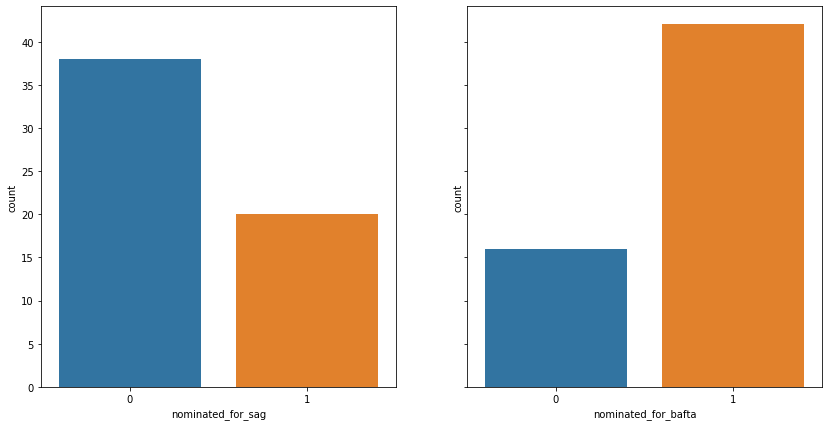

In [42]:
fig, (ax1, ax2) = plt.subplots(figsize=(14,7),ncols=2, sharey=True)

sns.countplot(x="nominated_for_sag", data=y, ax=ax1)
sns.countplot(x="nominated_for_bafta", data=y, ax=ax2)

Genres, however, proved to be much more helpful. As you can see, the overwhelming majority of Best Picture nominees are dramas. Given that we randomly selected 1 genre for multi-genre movies, there could be even more.

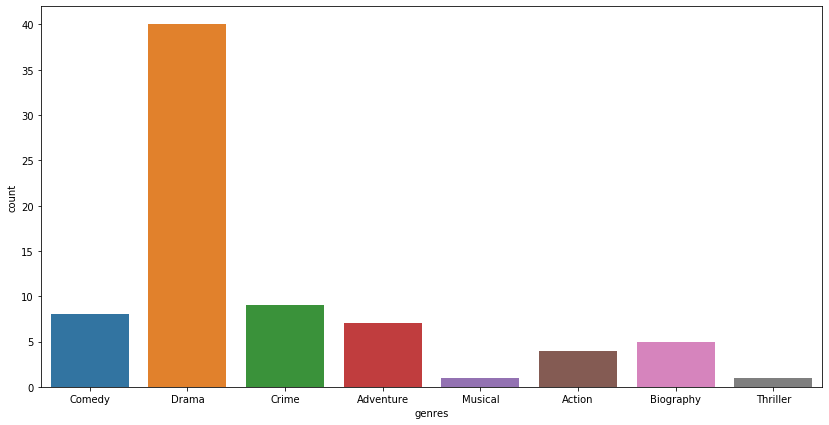

In [43]:
winners_only = final_dataset_with_nom[final_dataset_with_nom['winner'] == 1]
f, axis = plt.subplots(figsize=(14, 7))
sns.countplot(x='genres', data=winners_only)

In order to work with genres for ML, we gave each genre a number.

In [44]:

genres = {'Crime': 0,'Drama': 1, 'Comedy': 2, 'Mystery': 3, 'Action' : 4, 
          'Adventure' : 5, 'Musical' : 6, 'Film-Noir' : 7, 'Children' : 8,
          'Animation' : 9, 'Western' : 10, 'Thriller' : 11, 'Sci-Fi' : 12,
          'Horror' : 13, 'Documentary' : 14, 'Romance' : 15, 'War' : 16, 
          '(no genres listed)' : 17, 'Fantasy' : 18, 'Biography' : 19, 'Music' : 20, 
          'History' : 21, 'Family' : 22, 'Adult' : 23, 'Adveture' : 5, 'Sport' : 25,
          'News': 26, 'Reality-TV' : 27
 
          }
final_dataset_with_nom.genres = [genres[item] for item in final_dataset_with_nom.genres]

In [45]:
final_dataset_with_nom.head()

,year,category,winner,title,genres,rating,runtimeMinutes,nominated_for_sag,won_sag,nominated_for_bafta,won_bafta
0,1993,NaN,NaN,Dama de noche,1,6.2,102,0,NaN,0,NaN
1,1944,NaN,NaN,Bermuda Mystery,3,5.9,65,0,NaN,0,NaN
2,1944,NaN,NaN,Experiment Perilous,7,6.5,91,0,NaN,0,NaN
3,1944,NaN,NaN,Johnny Doesn't Live Here Anymore,2,5.9,79,0,NaN,0,NaN
4,1945,NaN,NaN,Night Club Girl,2,6.4,61,0,NaN,0,NaN


In [46]:
final_dataset_with_nom.isna().sum()

year                      0
category               1736
winner                 1736
title                     0
genres                    0
rating                    0
runtimeMinutes            0
nominated_for_sag         0
won_sag                2068
nominated_for_bafta       0
won_bafta              1991
dtype: int64

In [47]:
final_dataset_with_nom = final_dataset_with_nom.sort_values(by=['year'])

In [48]:
final_dataset_with_nom.head()

,year,category,winner,title,genres,rating,runtimeMinutes,nominated_for_sag,won_sag,nominated_for_bafta,won_bafta
1805,1944,BEST PICTURE,1.0,Going My Way,2,7.2,126,0,NaN,0,NaN
745,1944,NaN,NaN,How to Fly the B-26 Airplane,14,5.7,47,0,NaN,0,NaN
1807,1944,BEST PICTURE,0.0,Wilson,1,6.8,154,0,NaN,0,NaN
1806,1944,BEST PICTURE,0.0,Since You Went Away,1,7.6,177,0,NaN,0,NaN
1803,1944,BEST PICTURE,0.0,Double Indemnity,0,8.3,107,0,NaN,0,NaN


# Machine Learning

Moving onto the machine learning portion, we first allocated our training and testing sets. We allocated 33% of our final dataset for testing set and the other 67% for our training set. 

In [49]:
from sklearn.model_selection import train_test_split
#data = [[genre, rating, nominees_for_other_movies, duration]]
#target = [0 or 1] NaN is no nominated, BAFTA/SAG is nominated
#we should change BAFTA/SAG to 1

final_features = []
final_results = []
for index, row in final_dataset_with_nom.iterrows():
  features = [row['genres'], int(row['rating']),
             row['nominated_for_bafta'], row['nominated_for_sag'], 
              row['runtimeMinutes']
  ]
  if (np.isnan(row['winner'])):
    results = 0
  else:
    results = 1
  final_features.append(features)
  final_results.append(results)

data = np.array(final_features)
target = np.array(final_results)


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [50]:
data

array([[  2,   7,   0,   0, 126],
       [ 14,   5,   0,   0,  47],
       [  1,   6,   0,   0, 154],
       ...,
       [  2,   6,   0,   0, 105],
       [ 14,   8,   0,   0,  75],
       [ 18,   8,   0,   0, 114]])

For our first method, we decided to utilize the Naive Bayes method. We were curious to see how the training set would correctly predict the results of the testing set.

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
model = GaussianNB()
 
model.fit(X_train, y_train)
predicted = model.predict(X_test)
y_predicted = model.predict(X_train)
y_expected = y_train

In [53]:
from sklearn import metrics
print(metrics.accuracy_score(y_expected, y_predicted))
print()
print(metrics.classification_report(y_expected, y_predicted))
print(metrics.confusion_matrix(y_expected, y_predicted))

0.8846421125781793

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1154
           1       0.98      0.43      0.60       285

    accuracy                           0.88      1439
   macro avg       0.93      0.71      0.76      1439
weighted avg       0.90      0.88      0.87      1439

[[1151    3]
 [ 163  122]]


Overall, we see that this model has over a 80% chance of correctly predicting that a movie wouldn't be nominated for an Oscar. Meanwhile, the model has over 90% chance of correctly predicting that a movie would be nominated. 

While this is pretty decent for a first try, we were still a bit wary and wanted to try out another machine learning model. We will perform logistic regression on our dataset. However before that we used Scikit-learn's OneHotEncoder to readjust our data in hopes of improving the performance of the regression. 

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [55]:
OHE = OneHotEncoder(sparse=False)

IMP = SimpleImputer()

In [56]:
OHE.fit(final_dataset_with_nom[['nominated_for_bafta']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [57]:
OHE.transform(final_dataset_with_nom[['nominated_for_bafta']])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [58]:
IMP.fit(final_dataset_with_nom[['rating']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [59]:
final_dataset_with_nom.rating.head()

1805    7.2
745     5.7
1807    6.8
1806    7.6
1803    8.3
Name: rating, dtype: float64

In [60]:
ct = make_column_transformer((OHE, ['nominated_for_bafta', 'nominated_for_sag']), (IMP, ['rating', 'runtimeMinutes', 'genres']), remainder='passthrough')

In [61]:
cols = ['nominated_for_bafta', 'nominated_for_sag', 'genres', 'rating', 'runtimeMinutes']

final_df = final_dataset_with_nom[cols]
final_df.head()

,nominated_for_bafta,nominated_for_sag,genres,rating,runtimeMinutes
1805,0,0,2,7.2,126
745,0,0,14,5.7,47
1807,0,0,1,6.8,154
1806,0,0,1,7.6,177
1803,0,0,0,8.3,107


In [62]:
a = ct.fit_transform(final_df)

a[:5, :]

array([[  1. ,   0. ,   1. ,   0. ,   7.2, 126. ,   2. ],
       [  1. ,   0. ,   1. ,   0. ,   5.7,  47. ,  14. ],
       [  1. ,   0. ,   1. ,   0. ,   6.8, 154. ,   1. ],
       [  1. ,   0. ,   1. ,   0. ,   7.6, 177. ,   1. ],
       [  1. ,   0. ,   1. ,   0. ,   8.3, 107. ,   0. ]])

With the data now converted as needed, we can perform the logistic regression. 

In [63]:

from sklearn.linear_model import LogisticRegression

In the final dataset, we found that some of our winner values were n/a. Thus we replaced the n/a values with 0, assuming that these movies didn't win.

In [64]:
final_dataset_with_nom['winner'] = final_dataset_with_nom['winner'].fillna(55)
final_dataset_with_nom.winner.unique()

oscar_nom = {55: 0, 0: 1, 1: 1}
final_dataset_with_nom.winner = [oscar_nom[item] for item in final_dataset_with_nom.winner]
final_dataset_with_nom.winner.unique()

array([1, 0])

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
x = final_dataset_with_nom[['nominated_for_bafta']]

y = final_dataset_with_nom.winner
lgr = LogisticRegression(max_iter=7000)
cross_val_score(lgr, x, y, cv=5, scoring='accuracy')

array([0.80697674, 0.86511628, 0.88139535, 0.93006993, 0.8997669 ])

In [67]:
from sklearn.pipeline import make_pipeline

We wanted to see what the performance accuracy was based on the following features: BAFTA nomination, SAG nomination, rating, runtime, and genre. 

In [68]:

ct2 = make_column_transformer((OHE, ['nominated_for_bafta', 'nominated_for_sag']), (IMP, ['rating', 'runtimeMinutes', 'genres']), remainder='passthrough')
p1 = make_pipeline(ct2, lgr)

X = final_df

Y = final_dataset_with_nom.winner


cross_val_score(p1, X, Y, cv=5, scoring='accuracy').mean()


0.8896991380712311

Pretty high, but let's see the performance accuracy for a single feature. Let's try genres, rating, runtime, and nominations for other awards, in that order.

In [69]:
x2 = final_dataset_with_nom[['genres']]

y = final_dataset_with_nom.winner
lgr = LogisticRegression(max_iter=7000)
cross_val_score(lgr, x2, y, cv=5, scoring='accuracy').mean()

0.8081942863338213

In [70]:
x4 = final_dataset_with_nom[['rating']]

y = final_dataset_with_nom.winner
lgr = LogisticRegression(max_iter=7000)
cross_val_score(lgr, x4, y, cv=5, scoring='accuracy').mean()

0.7769924648994417

In [71]:
x5 = final_dataset_with_nom[['runtimeMinutes']]

y = final_dataset_with_nom.winner
lgr = LogisticRegression(max_iter=7000)
cross_val_score(lgr, x5, y, cv=5, scoring='accuracy').mean()

0.8189038868108636

In [72]:
x1 = final_dataset_with_nom[['nominated_for_bafta']]

y = final_dataset_with_nom.winner
lgr = LogisticRegression(max_iter=7000)
cross_val_score(lgr, x1, y, cv=5, scoring='accuracy').mean()

0.8766650403859707

In [73]:
x2 = final_dataset_with_nom[['nominated_for_sag']]

y = final_dataset_with_nom.winner
lgr = LogisticRegression(max_iter=7000)
cross_val_score(lgr, x2, y, cv=5, scoring='accuracy').mean()

0.8445590068845883

Not as high, so perhaps the combination of features (but not all features) would better predict than just one feature. Let's try out other combinations of features like: BAFTA nomination, genres, and ratings.

In [74]:
ct3 = make_column_transformer((OHE, ['nominated_for_bafta']), (IMP, ['genres', 'rating']))
p1 = make_pipeline(ct3, lgr)

X = final_df

Y = final_dataset_with_nom.winner


cross_val_score(p1, X, Y, cv=5, scoring='accuracy').mean()

#bafta does better than sag

0.8668878408413292

Not as high as the previous combination, but lets now try: SAG nomination, genres, and rating. 

In [75]:
ct4 = make_column_transformer((OHE, ['nominated_for_sag']), (IMP, ['genres', 'rating']))
p2 = make_pipeline(ct4, lgr)

# X = final_df

# Y = final_dataset_with_nom.winner


cross_val_score(p2, X, Y, cv=5, scoring='accuracy').mean()

0.8445373231419742

This is interesting, including the SAG feature and not BAFTA seems to result in a lower prediction accuracy. Let's see what the prediction accuracy is for solely the SAG feature.

The SAG feature in fact has a lower prediction accuracy than the previous attempts. It's also interesting to note that the EDA suggests that movies were nominated for an Oscar may not have won a SAG. Thus this could be reflected in the prediction accuracy as the results of SAG wouldn't accurately predict Oscar nomination as well as BAFTA.

In [76]:
ct6 = make_column_transformer((OHE, ['nominated_for_bafta']), (IMP, ['genres']))
p2 = make_pipeline(ct6, lgr)

X = final_df

Y = final_dataset_with_nom.winner


cross_val_score(p2, X, Y, cv=5, scoring='accuracy').mean()

0.8766650403859707

In [77]:

ct5 = make_column_transformer((OHE, ['nominated_for_sag']), (IMP, ['genres']))
p1 = make_pipeline(ct5, lgr)

X = final_df

Y = final_dataset_with_nom.winner


cross_val_score(p1, X, Y, cv=5, scoring='accuracy').mean()

0.8445590068845883

Let's put BAFTA back in along with runtime, genres, and ratings.

In [78]:
ct_0 = make_column_transformer((OHE, ['nominated_for_bafta']), (IMP, ['genres', 'rating', 'runtimeMinutes']))
p1 = make_pipeline(ct_0, lgr)

X = final_df

Y = final_dataset_with_nom.winner


cross_val_score(p1, X, Y, cv=5, scoring='accuracy').mean()


0.884570932943026

This seems to give the second highest prediction accuracy out of all the combinations we've tried. 

This comes to show that a movie's chance of getting nominated for an Oscar relies more on features such as: BAFTA nomination, runtime, genres, and rating. On the other hand, other features such as SAG nomination are less important in predicting an Oscar nomination. 

While this study isn't definite, it's a good place for movie directors to refer to if they hope to produce a movie that will get nominated for an Oscar. These features are by no means trying to limit the creativity of directors but rather to give them insight through a more business related perspective, which is prominent in the movie industry. 